## Pre-processing GSE36681 part 1 (non-small cell lung cancer, normalized series matrix)

The script allows to pre-process **GSE36681** series matrix acquired from GEO data base.
<br>
<br>
**GSE36681** data set consists of **206 samples** and two subsets, **FF (fresh-frozen) and FFPE (formalin-fixed, paraffin-embedded)**.

**FF subset consists of:**
* 56 positive samples, 
* and 56 negative samples (adjacent to the positive). 

**FFPE subset consists of:**
* 47 positive samples, 
* and 47 negative samples (adjacent to the positive). 
<br>

**For detailed information please refer to:** https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE36681
<br>

**Related publication:**
<br>
Jang JS, Jeon HS, Sun Z, Aubry MC et al. Increased miR-708 expression in NSCLC and its association with poor survival in lung adenocarcinoma from never smokers. Clin Cancer Res 2012 Jul 1;18(13):3658-67. (DOI: 10.1158/1078-0432.CCR-11-2857)

**Before you start:**
* The code is writen in **R**.
* **Download** and unzip series matrix first: 
https://ftp.ncbi.nlm.nih.gov/geo/series/GSE36nnn/GSE36681/matrix/GSE36681_series_matrix.txt.gz
* **Required libraries**: *GEOquery*, *repr*

The code is written by @MelaniaNowicka, Free University of Berlin (contact: melania.nowicka@gmail.com).

**Import necessary libraries**

In [1]:
#read the library
library("GEOquery")
library("repr")

#read utility functions
source("utility-functions.R")

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with


**Read GEO data from series matrix using getGEO()**

In [2]:
#get the data from series matrix
print("Reading data...")
data <- getGEO(filename="GSE36681_series_matrix.txt")

[1] "Reading data..."


Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
File stored at: 
C:\Users\melan\AppData\Local\Temp\Rtmp0q2s24/GPL8179.soft


**Extract count matrix**

In [3]:
#get count.matrix
count.matrix <- exprs(object = data)
head(count.matrix)

,GSM898517,GSM898518,GSM898519,GSM898520,GSM898521,GSM898522,GSM898523,GSM898524,GSM898525,GSM898526,...,GSM900311,GSM900312,GSM900313,GSM900314,GSM900315,GSM900316,GSM900317,GSM900318,GSM900319,GSM900320
ILMN_3166935,421.597,426.775,475.978,617.321,459.905,730.037,976.551,552.369,447.057,678.213,...,1477.610,2119.330,3912.380,1784.480,945.735,16432.600,1814.190,1278.330,1805.170,1576.600
ILMN_3166938,575.385,3856.030,4874.420,4874.420,3449.840,4548.490,421.739,6080.650,463.657,1430.900,...,15416.600,14226.200,13717.400,12568.900,12568.900,12176.200,16432.600,16055.400,17505.700,6611.080
ILMN_3166940,508.937,567.755,982.066,557.726,546.085,511.154,684.462,550.447,640.712,1311.820,...,1140.520,1104.900,494.257,886.758,1135.780,3691.400,571.632,567.199,702.350,803.973
ILMN_3166941,803.066,1442.600,690.519,1569.130,1610.580,438.904,6486.760,930.446,1681.410,1243.760,...,5754.210,5334.190,2443.360,1737.600,2410.380,10969.600,7513.920,1855.450,1885.380,1185.880
ILMN_3166943,475.585,562.682,600.949,524.270,550.447,484.771,1311.820,591.420,589.002,500.395,...,1426.080,1586.060,1814.190,2000.160,1405.580,1313.710,1561.440,1611.190,1603.490,3026.380
ILMN_3166944,417.004,379.432,373.455,385.894,424.836,445.616,418.557,395.240,427.141,393.679,...,442.005,515.596,419.413,430.327,565.163,436.038,388.935,454.077,381.276,458.843


**Show information about sample source**

In [4]:
print("Classes in the series matrix: ")
samples <- as.data.frame(table(data@phenoData@data$source_name_ch1))
colnames(samples) <- c("Sample source", "Frequency")
samples

[1] "Classes in the series matrix: "


Sample source,Frequency
miRNA_FF_normal,56
miRNA_FF_tumor,56
miRNA_FFPE_normal,47
miRNA_FFPE_tumor,47


In [5]:
#set miRNA names to miRNA IDs
rownames(count.matrix) <- data@featureData@data$miRNA_ID
original.data.row.numb <- nrow(count.matrix)
print(paste("Number of samples: ", ncol(count.matrix)))
print(paste("Number of features: ", original.data.row.numb))

[1] "Number of samples:  206"
[1] "Number of features:  1145"


**Prepare annotation**

In [6]:
#assign annotation
annotation <- data@phenoData@data$source_name_ch1
annotation <-as.numeric(factor(annotation))
annotation[annotation == 1] <- 0
annotation[annotation == 2] <- 1
annotation[annotation == 3] <- 0
annotation[annotation == 4] <- 1
annotation.FFPE <- annotation[1:94]
annotation.FF <- annotation[95:length(annotation)]

**Filter non-human and *-miRNAs (non dominant product)**

Note, in terms of *-miRNAs we remove all miRNAs that have * in their IDs. We do not screen the sequences against miRNA data bases. Please, prepare your own data accordingly to your needs.

In [7]:
#remove non-human miRNAs
count.matrix <- count.matrix[c(grep("hsa*", rownames(count.matrix))),]
non.human.data.row.numb <- nrow(count.matrix)
print(paste("Removed non-human features:", original.data.row.numb-nrow(count.matrix)))
print(paste("Number of features: ", non.human.data.row.numb))

#remove pre-miRNAs
count.matrix <- count.matrix[c(-grep("\\*", rownames(count.matrix))),]
print(paste("Removed * features:", non.human.data.row.numb-nrow(count.matrix)))
print(paste("Number of features: ", nrow(count.matrix)))

[1] "Removed non-human features: 287"
[1] "Number of features:  858"
[1] "Removed * features: 171"
[1] "Number of features:  687"


**Pre-process FFPE data**

As GSE36681 data set was quantile normalized the quantile filtering may be omitted as it has no influence on the data set.

In [8]:
#FFPE ----------------------------------------------------

#move negative samples first, positive samples next
count.matrix.FFPE <- count.matrix[,1:94]
print(paste("Number of samples: ", ncol(count.matrix.FFPE)))
count.matrix.FFPE.neg <- count.matrix.FFPE[,which(annotation.FFPE %in% c(0))]
print(paste("Number of negative samples: ", ncol(count.matrix.FFPE.neg)))
count.matrix.FFPE.pos <- count.matrix.FFPE[,which(annotation.FFPE %in% c(1))]
print(paste("Number of positive samples: ", ncol(count.matrix.FFPE.pos)))
count.matrix.FFPE <- cbind(count.matrix.FFPE.neg, count.matrix.FFPE.pos)
annotationneg <- rep(0,47)
annotationpos <- rep(1,47)
annotation.FFPE <- c(annotationneg, annotationpos)

#calculate quantiles 
#GSE36681_FFPE_quantile_global <- quantile(as.vector(as.matrix(count.matrix.FFPE)))
#q25 <- GSE36681_FFPE_quantile_global["25%"]
#print(paste("25% q: ", q25))
#q75 <- GSE36681_FFPE_quantile_global["75%"]
#print(paste("75% q: ", q75))

#GSE36681_FFPE_quantile_column <- apply(count.matrix.FFPE, 2, quantile)

# find samples that do not meet the quality criterion
#quantile_filtering <- GSE36681_FFPE_quantile_column["50%",] >= q25 & GSE36681_FFPE_quantile_column["50%",] <= q75

#print(paste("Number of samples before quality control: ", ncol(count.matrix.FFPE)))
#count.matrix.FFPE.f <- count.matrix.FFPE[, quantile_filtering]
#print(paste("Number of samples before quality control: ", ncol(count.matrix.FFPE)))

# counting 
#quantile_filtering_neg <- quantile_filtering[1:47]
#count_neg_removed <- sum(quantile_filtering_neg==FALSE)
#quantile_filtering_pos <- quantile_filtering[48:94]
#count_pos_removed <- sum(quantile_filtering_pos==FALSE)

# removal from the separate negative sample and positive sample count matrix
#count.matrix.FFPE.neg.f <- count.matrix.FFPE.neg[, quantile_filtering_neg]
#count.matrix.FFPE.pos.f <- count.matrix.FFPE.pos[, quantile_filtering_pos]

#assign annotation
#neg_samples <- 47 - count_neg_removed
#pos_samples <- 47 - count_pos_removed

[1] "Number of samples:  94"
[1] "Number of negative samples:  47"
[1] "Number of positive samples:  47"


**Show boxplot for all samples**

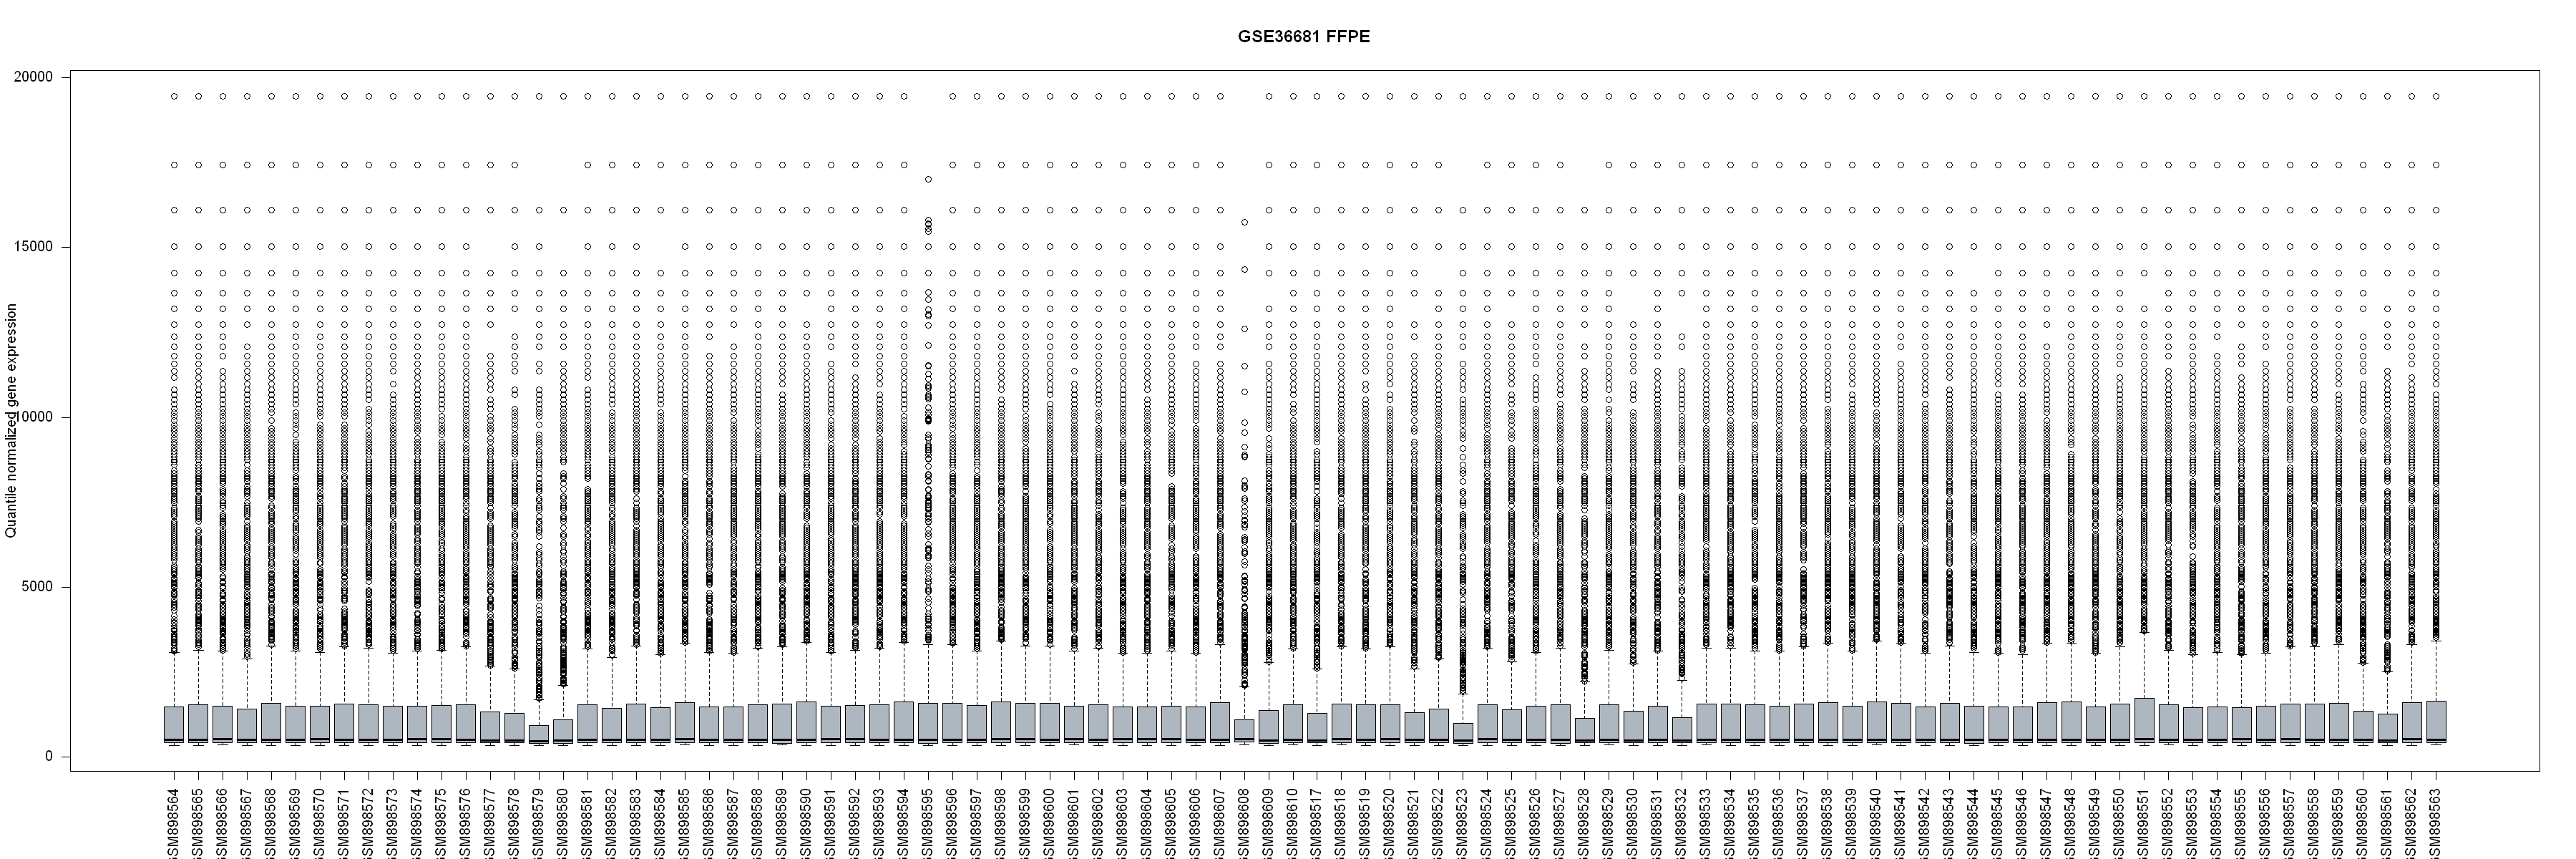

In [9]:
#show boxplot
#jpeg(file="GSE36681_FFPE_all.jpeg", width=1500, height=500)
options(repr.plot.width=30, repr.plot.height=10)
boxplot(count.matrix.FFPE, col = "#AEB6BF", las = 2, main="GSE36681 FFPE", ylab="Quantile normalized gene expression")
#dev.off()

**Show boxplots for positive and negative samples separately**

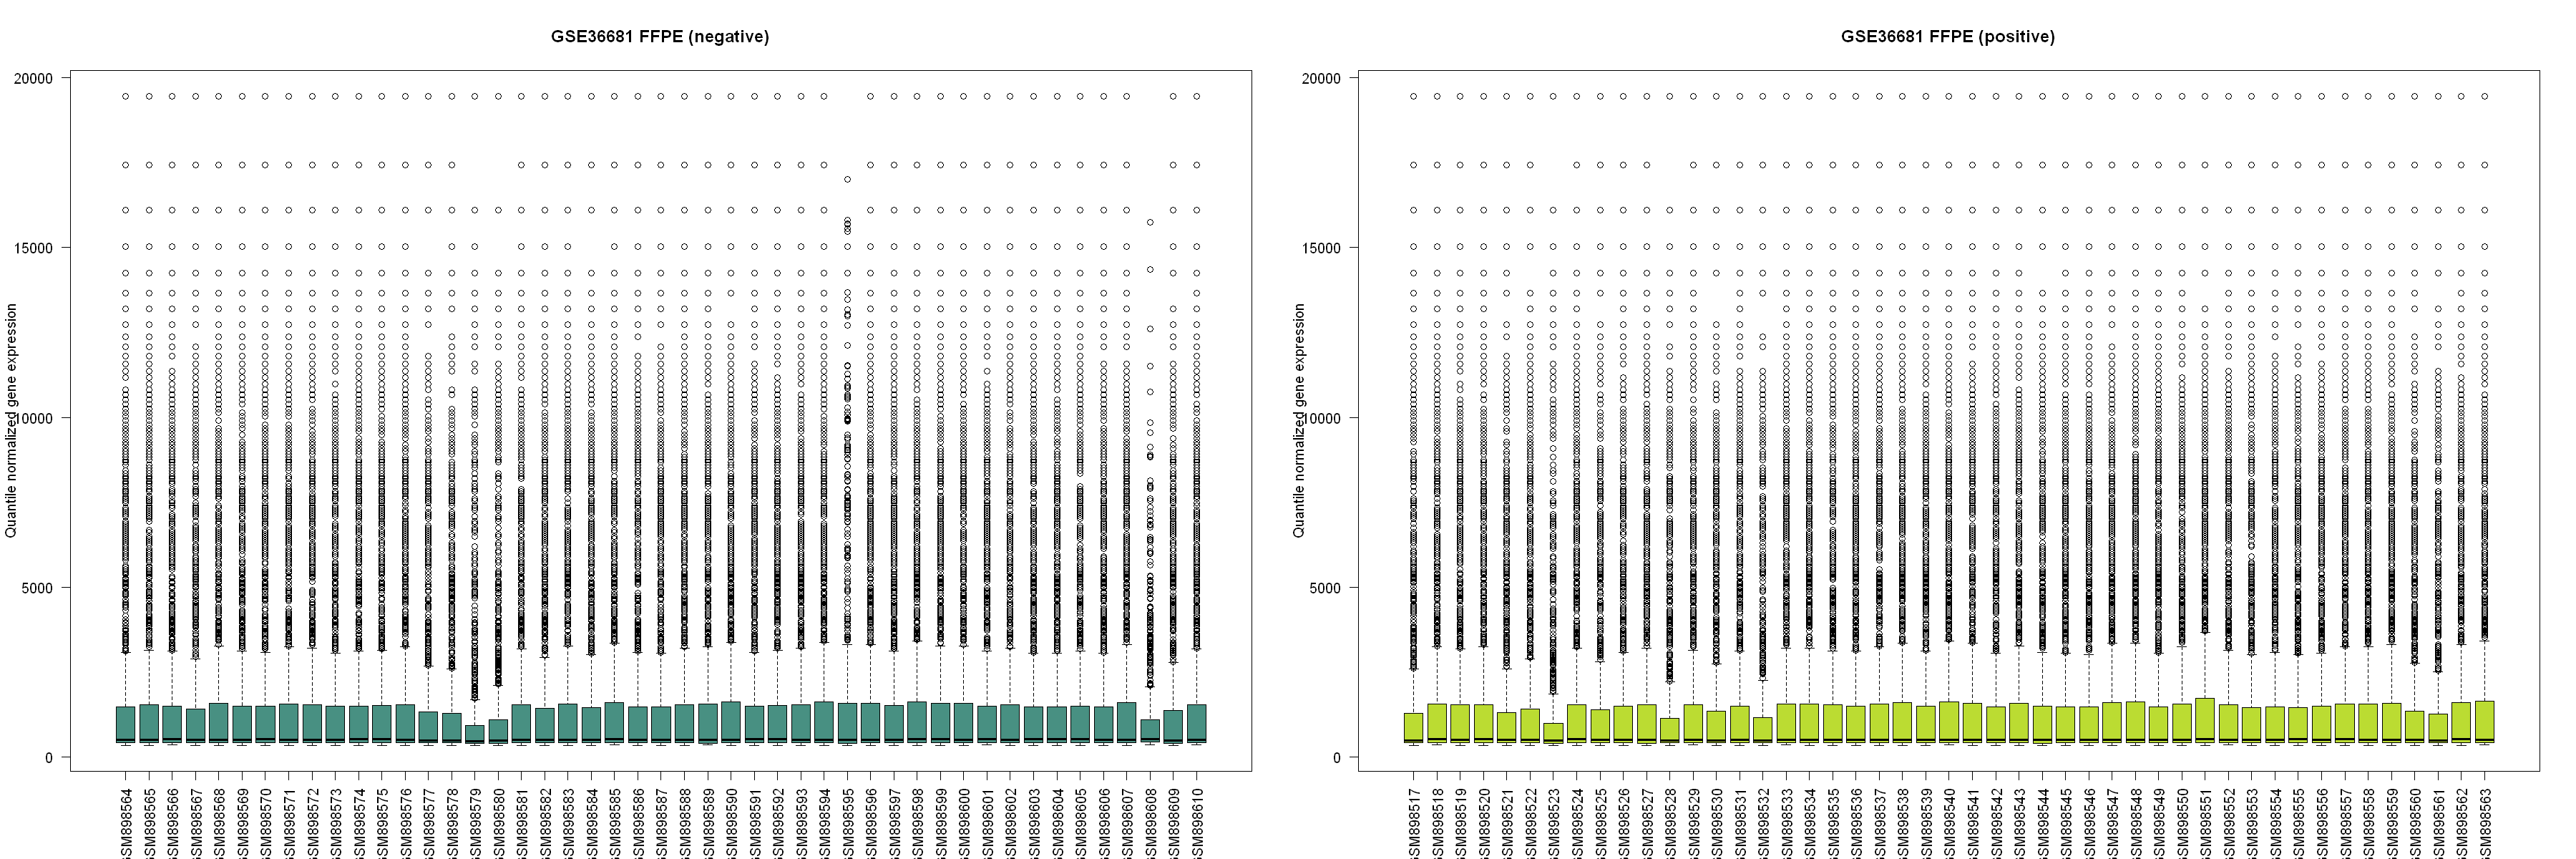

In [10]:
#jpeg(file="GSE36681_FFPE_pos_neg.jpeg", width=1500, height=500)
options(repr.plot.width=30, repr.plot.height=10)
lmts <- range(count.matrix.FFPE.neg, count.matrix.FFPE.pos)
par(mfrow = c(1, 2))
boxplot(count.matrix.FFPE.neg, col = "#217867d2", las = 2, main="GSE36681 FFPE (negative)", ylab="Quantile normalized gene expression")
boxplot(count.matrix.FFPE.pos, col = "#aad400cd", las = 2, main="GSE36681 FFPE (positive)", ylab="Quantile normalized gene expression")
#dev.off()

**Format data and save as .csv**

In [11]:
#transform data
original_ids <- colnames(count.matrix.FFPE)
new_ids <- seq(1,length(colnames(count.matrix.FFPE)),1)
sample.info <- data.frame(original_ids, new_ids, annotation.FFPE)
write.table(sample.info, paste("GSE36681_FFPE", "_sample_info.csv", sep=""),  sep = ";", row.names = FALSE, quote=FALSE)
colnames(count.matrix.FFPE) <- seq(1,length(colnames(count.matrix.FFPE)),1)

transformed.data.set <- transform_data(annotation.FFPE, count.matrix.FFPE)
head(transformed.data.set)

data.set.name = paste("GSE36681_FFPE", ".csv", sep="", collapse = NULL)

write.table(transformed.data.set, data.set.name,  sep = ";", row.names = FALSE, quote=FALSE)

ID,Annots,hsa-miR-329,hsa-miR-424,hsa-miR-137,hsa-miR-376c,hsa-miR-585,hsa-miR-302c,hsa-miR-487a,hsa-miR-202,...,hsa-miR-1300,hsa-miR-1301,hsa-miR-1178,hsa-miR-1302,hsa-miR-450b-3p,hsa-miR-1303,hsa-miR-1180,hsa-miR-1304,hsa-miR-1305,hsa-miR-450b-5p
1,0,494.027,5520.13,540.16,773.453,611.749,387.672,412.899,422.981,...,715.343,1243.76,374.347,421.739,492.522,443.545,462.07,418.97,1112.21,1062.28
2,0,411.947,3777.64,593.761,836.237,654.015,404.84,396.078,424.681,...,555.001,761.545,380.738,394.258,392.436,426.775,755.916,550.447,592.531,839.692
3,0,516.019,3670.45,483.139,1529.35,558.692,365.945,406.75,408.711,...,724.692,1134.48,443.545,373.77,389.064,519.417,548.758,476.381,606.274,1119.4
4,0,426.435,692.57,955.512,1931.88,897.931,408.458,401.489,416.733,...,1216.14,1710.16,390.428,407.555,513.584,447.306,508.348,397.773,911.887,2126.29
5,0,489.298,4736.25,911.887,1774.43,532.975,383.483,442.664,399.95,...,608.847,1742.05,377.63,391.022,422.813,494.027,549.569,431.748,647.172,825.026
6,0,451.77,1742.05,518.071,1042.77,634.013,387.047,479.771,472.181,...,806.624,1134.48,417.698,421.739,412.481,486.089,795.845,863.12,593.761,478.049


**Pre-process FF data**

In [12]:
#FF ----------------------------------------------------

#move negative samples first, positive samples next
count.matrix.FF <- count.matrix[,95:length(colnames(count.matrix))]
print(paste("Number of samples: ", ncol(count.matrix.FF)))
count.matrix.FF.neg <- count.matrix.FF[,which(annotation.FF %in% c(0))]
print(paste("Number of negative samples: ", ncol(count.matrix.FF.neg)))
count.matrix.FF.pos <- count.matrix.FF[,which(annotation.FF %in% c(1))]
print(paste("Number of positive samples: ", ncol(count.matrix.FF.pos)))
count.matrix.FF <- cbind(count.matrix.FF.neg, count.matrix.FF.pos)
annotationneg <- rep(0,56)
annotationpos <- rep(1,56)
annotation.FF <- c(annotationneg, annotationpos)

#calculate quantiles 
#GSE36681_FF_quantile_global <- quantile(as.vector(as.matrix(count.matrix.FF)))
#q25 <- GSE36681_FF_quantile_global["25%"]
#print(paste("25% q: ", q25))
#q75 <- GSE36681_FF_quantile_global["75%"]
#print(paste("75% q: ", q75))

#GSE36681_FF_quantile_column <- apply(count.matrix.FF, 2, quantile)

# find samples that do not meet the quality criterion
#quantile_filtering <- GSE36681_FF_quantile_column["50%",] >= q25 & GSE36681_FF_quantile_column["50%",] <= q75

#print(paste("Number of samples before quality control: ", ncol(count.matrix.FF)))
#count.matrix.FF <- count.matrix.FF[, quantile_filtering]
#print(paste("Number of samples before quality control: ", ncol(count.matrix.FF)))

# counting 
#quantile_filtering_neg <- quantile_filtering[1:56]
#count_neg_removed <- sum(quantile_filtering_neg==FALSE)
#quantile_filtering_pos <- quantile_filtering[57:112]
#count_pos_removed <- sum(quantile_filtering_pos==FALSE)

# removal from the separate negative sample and positive sample count matrix
#count.matrix.FF.neg <- count.matrix.FF.neg[, quantile_filtering_neg]
#count.matrix.FF.pos <- count.matrix.FF.pos[, quantile_filtering_pos]

#assign annotation
#neg_samples <- 56 - count_neg_removed
#pos_samples <- 56 - count_pos_removed

[1] "Number of samples:  112"
[1] "Number of negative samples:  56"
[1] "Number of positive samples:  56"


**Show boxplot for all samples**

null device 
          1

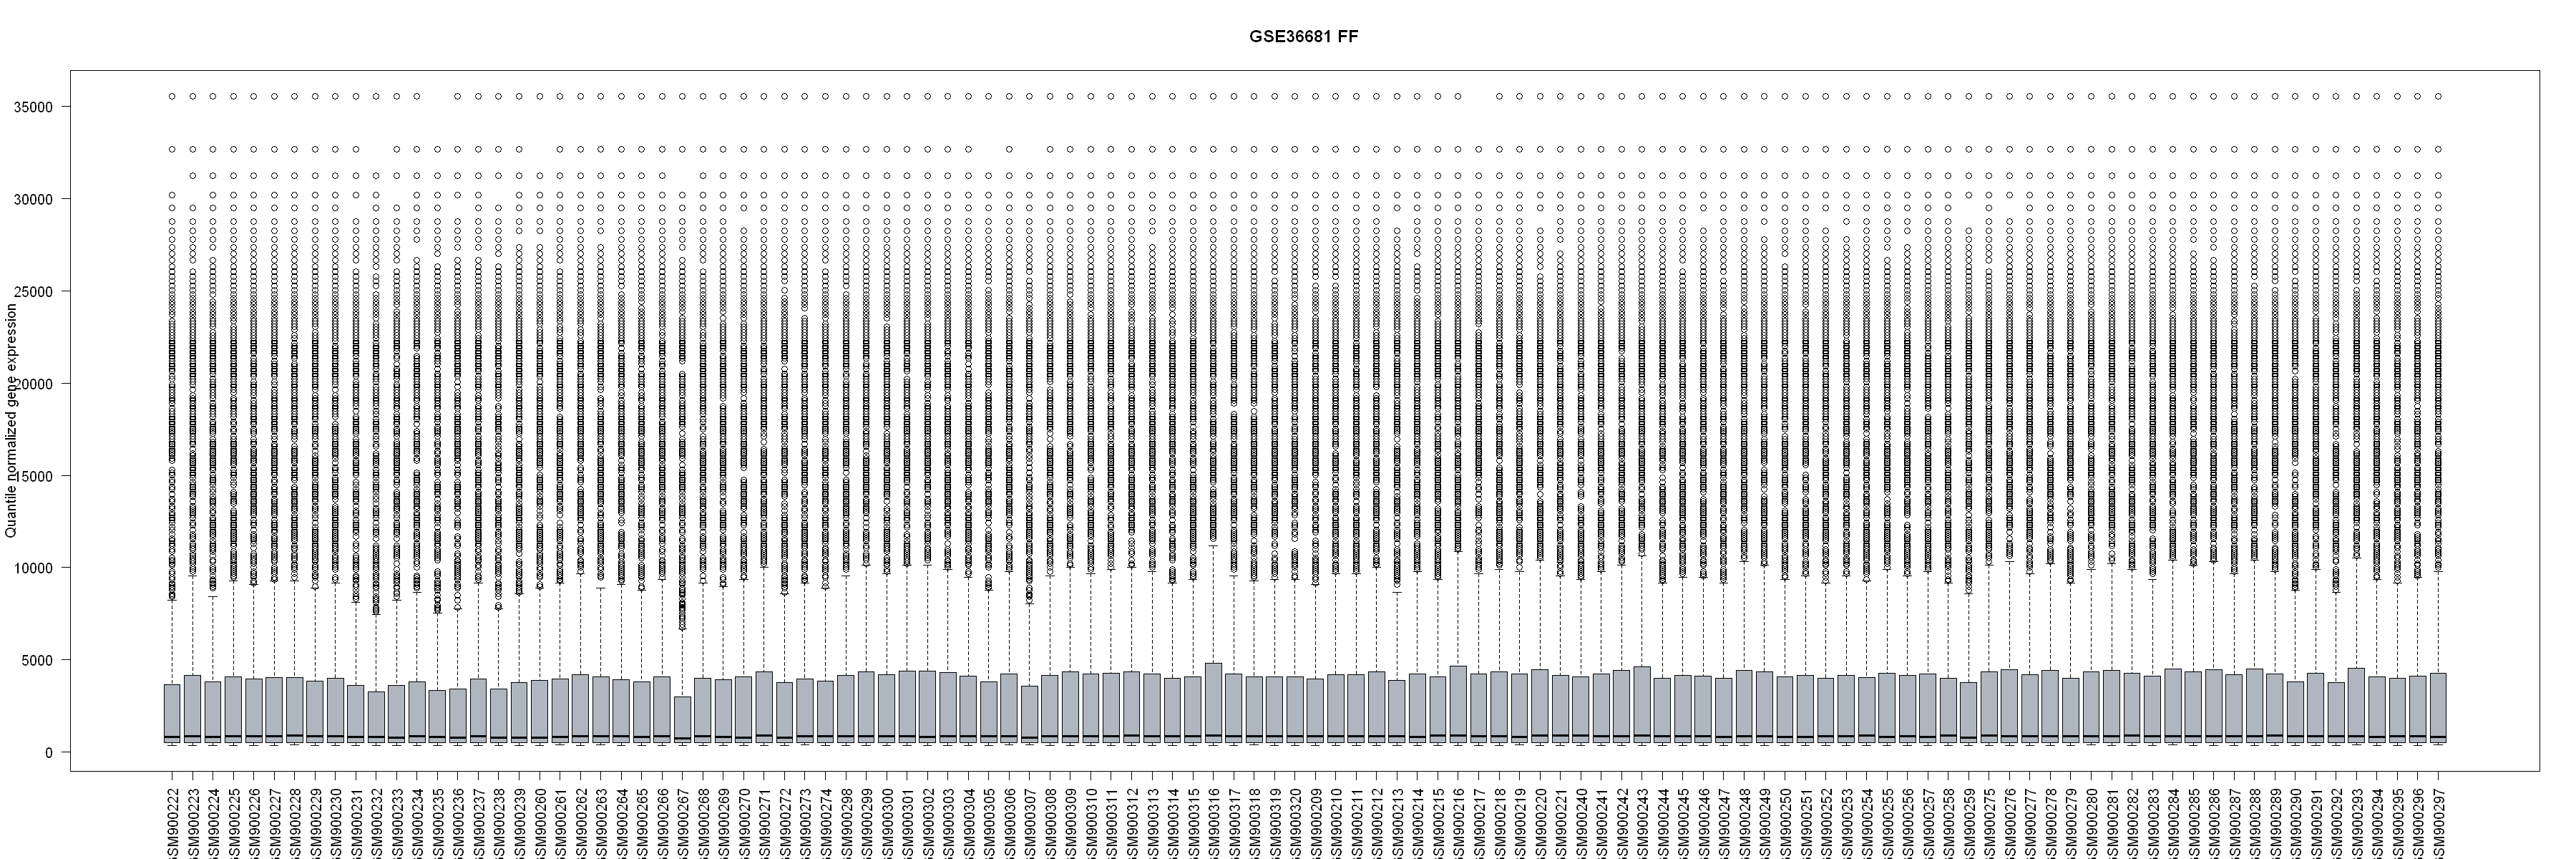

In [13]:
#show boxplot
#jpeg(file="GSE36681_FF_all.jpeg", width=1500, height=500)
options(repr.plot.width=30, repr.plot.height=10)
boxplot(count.matrix.FF, col = "#AEB6BF", las = 2, main="GSE36681 FF", ylab="Quantile normalized gene expression")
dev.off()

**Show boxplots for positive and negative samples separately after filtering**

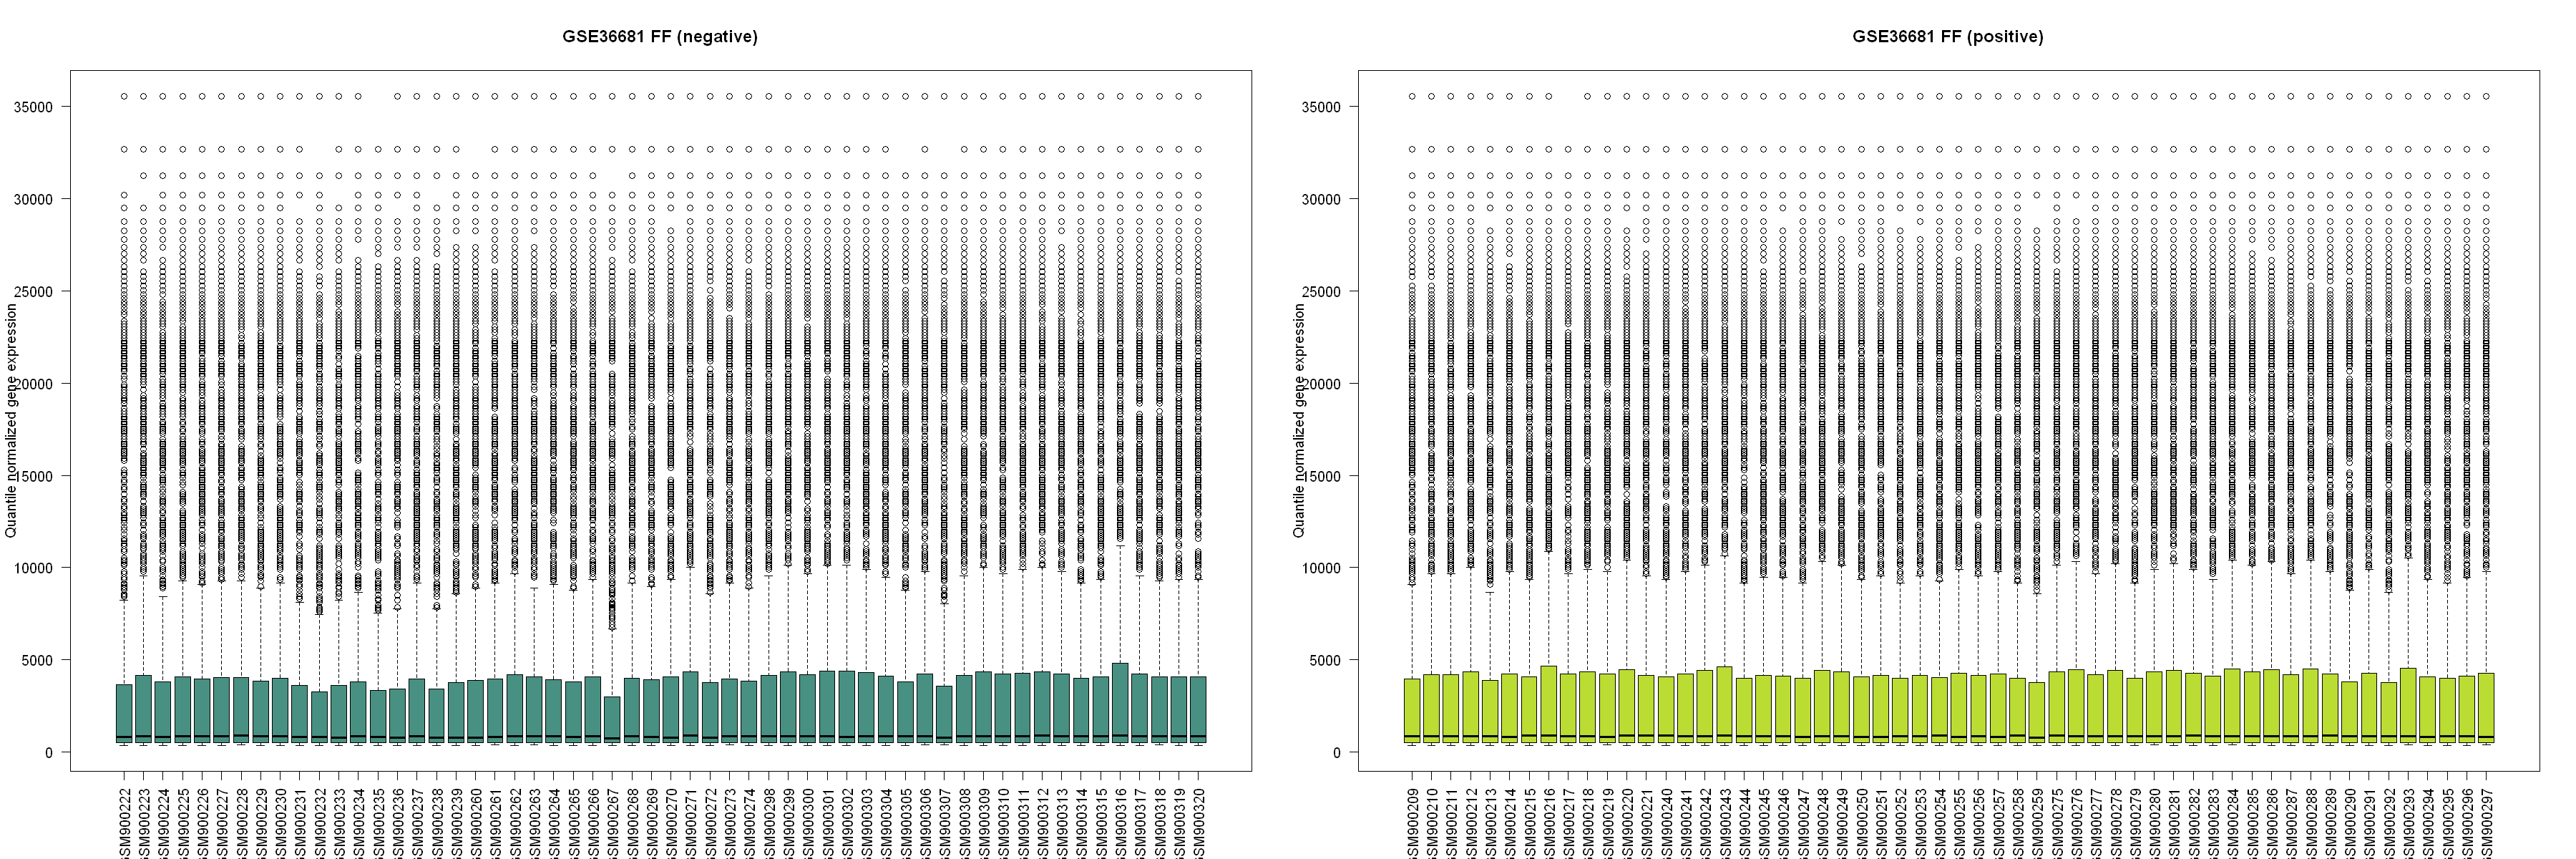

In [14]:
#jpeg(file="GSE36681_FF_pos_neg.jpeg", width=1500, height=500)
options(repr.plot.width=30, repr.plot.height=10)
lmts <- range(count.matrix.FF.neg, count.matrix.FF.pos)
par(mfrow = c(1, 2))
boxplot(count.matrix.FF.neg, col = "#217867d2", las = 2, main="GSE36681 FF (negative)", ylab="Quantile normalized gene expression")
boxplot(count.matrix.FF.pos, col = "#aad400cd", las = 2, main="GSE36681 FF (positive)", ylab="Quantile normalized gene expression")
#dev.off()

**Format data and save as .csv**

In [15]:
#transform data
original_ids <- colnames(count.matrix.FF)
new_ids <- seq(1,length(colnames(count.matrix.FF)),1)
sample.info <- data.frame(original_ids, new_ids, annotation.FF)
write.table(sample.info, paste("GSE36681_FF", "_sample_info.csv", sep=""),  sep = ";", row.names = FALSE, quote=FALSE)
colnames(count.matrix.FF) <- seq(1,length(colnames(count.matrix.FF)),1)

transformed.data.set <- transform_data(annotation.FF, count.matrix.FF)
head(transformed.data.set)

data.set.name = paste("GSE36681_FF", ".csv", sep="", collapse = NULL)

write.table(transformed.data.set, data.set.name,  sep = ";", row.names = FALSE, quote=FALSE)

ID,Annots,hsa-miR-329,hsa-miR-424,hsa-miR-137,hsa-miR-376c,hsa-miR-585,hsa-miR-302c,hsa-miR-487a,hsa-miR-202,...,hsa-miR-1300,hsa-miR-1301,hsa-miR-1178,hsa-miR-1302,hsa-miR-450b-3p,hsa-miR-1303,hsa-miR-1180,hsa-miR-1304,hsa-miR-1305,hsa-miR-450b-5p
1,0,8971.54,13972.4,866.787,9779.35,1398.58,427.473,638.145,647.294,...,862.147,15006.7,431.193,414.938,451.055,2326.02,5877.99,568.594,1455.14,1645.7
2,0,1855.45,17253.1,1126.42,1052.31,1313.71,492.067,922.796,533.979,...,1561.44,4179.29,452.367,398.801,404.084,1284.36,3533.19,837.415,1064.39,4940.05
3,0,857.356,13839.6,582.289,767.538,2700.37,407.561,439.177,510.559,...,552.417,2443.36,418.117,440.747,410.837,490.043,1108.94,529.841,1256.84,1834.77
4,0,765.527,19483.1,586.967,1864.67,3101.67,417.814,545.933,464.267,...,576.138,1824.25,390.681,427.173,381.276,481.754,816.775,565.858,1611.19,2294.12
5,0,967.544,18180,760.127,3074.67,2410.38,440.079,607.418,564.43,...,535.718,1611.19,407.147,431.193,395.731,456.789,1440.27,609.401,1477.61,2780.48
6,0,640.197,15283.1,595.862,3981.45,2512.26,407.907,505.86,536.925,...,554.454,1930.73,397.095,408.614,396.65,474.665,661.317,653.289,1619.05,1199.96
